# HW6 - Neural Network by `tf.keras`
##### 負責助教：張逸群 toosyou.tw@gmail.com

> 本次作業將使用 **Fashion-MNIST** 時尚資料集並以 `tf.keras` 設計 Neural Network 以進行衣物、鞋子及包包的辨識

---
    
## [資料簡介](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.  
Each example is a 28x28 grayscale image, associated with a label from 10 classes.  
We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.  
It shares the same image size and structure of training and testing splits.

---

#### 姓名：（點兩下編輯我）
#### 學號：（點兩下編輯我）

## Packages that Might Be Used

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data

from sklearn.metrics import classification_report

%matplotlib inline

### 相關連結

* Packages
    * [numpy](http://www.numpy.org/)
    * [pandas](https://pandas.pydata.org/)
    * [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    * [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)
    * [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras)
    * [tf.keras.datasets.fashion_mnist.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)
    * [tf.keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)
    * [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Markdown
    * jupyter 可以支援 markdown 區塊，方便打上文字說明此份 notebook 在做的事情
    * [wiki](https://zh.wikipedia.org/wiki/Markdown)
    * [教學](https://markdown.tw/)

## Load Data - 5%

#### 請使用 `tf.keras.datasets.fashion_mnist` 中提供的 `load_data` 函式讀取資料 - 5%

In [2]:
(X_train, y_train), (X_test, y_test) = '''Your Code Here'''

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

> 由此可見 `fashion_mnist.load_data` 已將 training set 與 testing set 分好了，  
> 一般是為了使各研究可以有一致的分割，因此這做法在公開資料集中非常常見

## Data Visualization - 25%

#### 請將 `X_train` 中的前二十五筆資料，使用 `plt.subplots` 以 $5\times5$ 排列畫製 - 10%
* [Hint](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot_toolbar.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-toolbar-py)

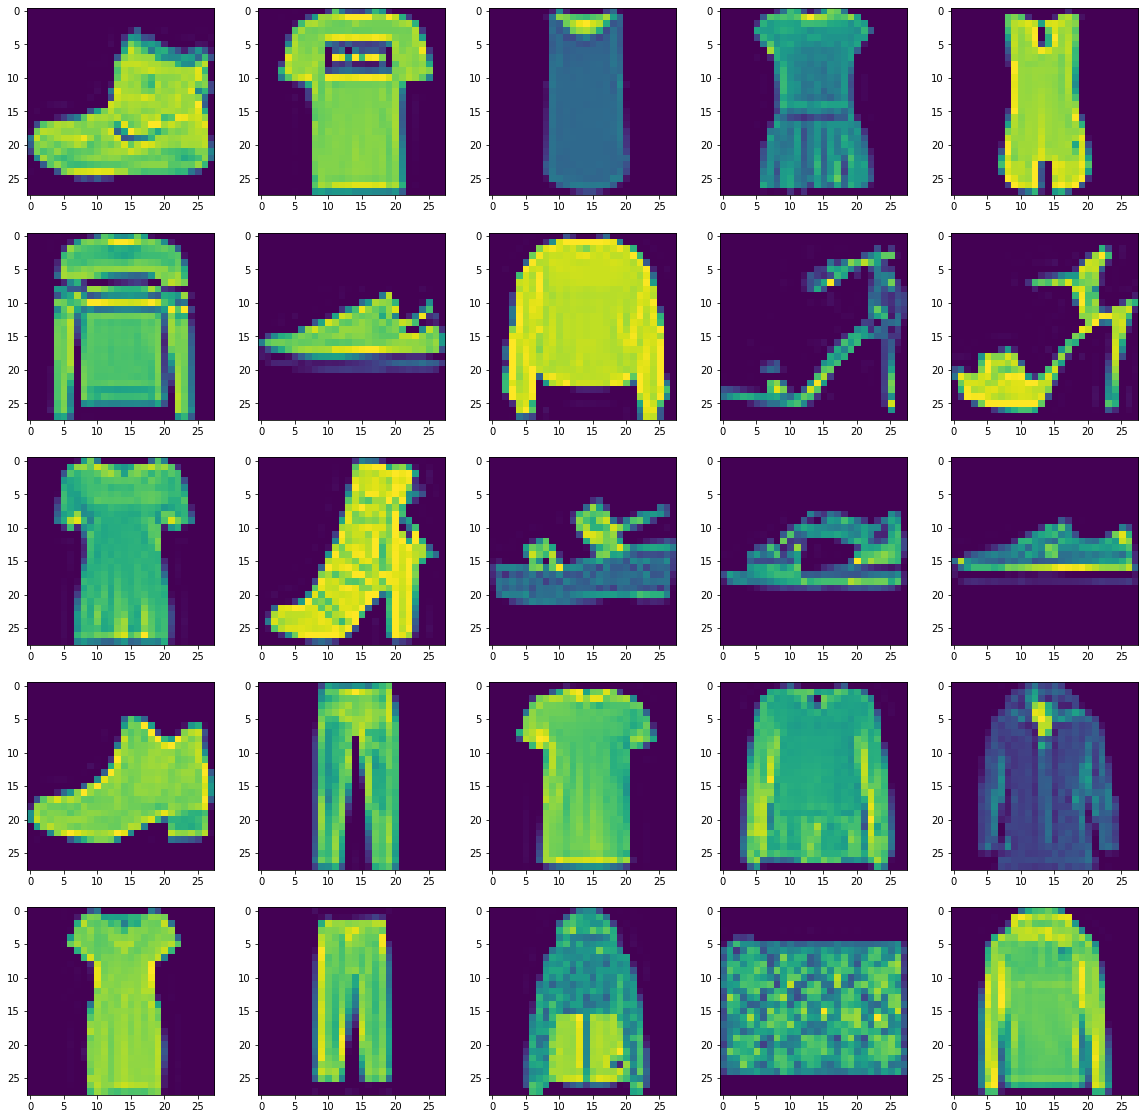

In [3]:
'''Your Code Here'''

#### 請回答以下問題 - 5%

1. 請問上方的圖，紫色的部分（背景）其數值為何？
    * ans

#### 請將 `X_train` 依照分類（`y_train`）分開，並將各分類取平均並繪製成 $2\times5$ 的圖 - 10%

* 假設某分類 $X$ 具有 $N$ 筆資料，第 $i$ 筆資料為 $X_i$，其中
$$
X_i = [ X_{i, 0, 0}, X_{i, 0, 1}, \cdot X_{i, 28, 28} ]^T
$$
* 該分類的平均 $\overline{X}$ 便為
$$
\overline{X} = [ \overline{X_{0, 0}}, \overline{X_{0, 1}}, \cdot \overline{X_{28, 28}} ]^T
$$
where,
$$
\overline{X_{a, b}} = \frac{\sum^{N-1}_{i=0}{X_{i, a, b}}}{N}, \\
\text{for  }0 \le a, b \le 27
$$

* [Hint](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

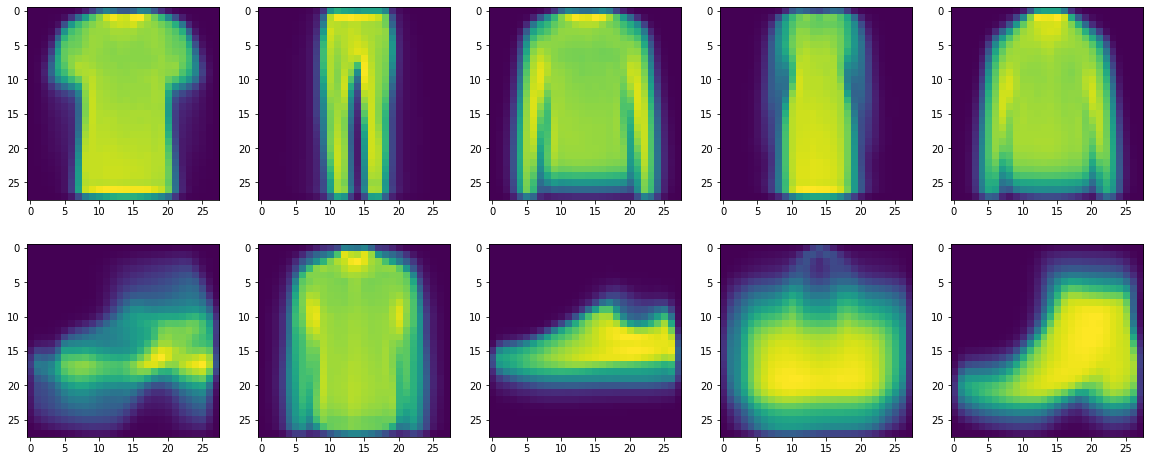

In [4]:
'''Your Code Here'''

## Preprocessing - 20%


#### 請將 `X_train` reshape 成 `(60000, 784)` 並將 `X_test` reshape 成 `10000, 784` - 5%

* 此步是為了符合後面 Neural Network 的 input 格式

In [5]:
X_train = '''Your Code Here'''
X_test  = '''Your Code Here'''

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

#### 請使用 `tensorflow.keras.utils.to_categorical` 將 `y_train` 及 `y_test` 轉換成 [**one-hot**](https://zh.wikipedia.org/wiki/One-hot) 形式 - 5%

In [6]:
y_train = '''Your Code Here'''
y_test  = '''Your Code Here'''

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [7]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### 請回答以下問題 - 10%

1. 請問什麼是 one-hot 格式？
    * ans

## Model Construction - 25%

#### 請建造一個 [Multilayer Perceptron (MLP)](https://zh.wikipedia.org/zh-tw/%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E5%99%A8)，並符合以下規格 - 5%

* [請使用 `tf.keras.Sequential` 進行 model 定義](https://tf.wiki/en/basic/models.html#use-keras-sequential-functional-api-to-build-models)
* 該 model 總共具有 $4$ 層 (layer)
    1. [Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input) ，並設定 shape 為 `(784, )`
    2. [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) ，任意設定 `units` 數量，並設定 `activation` 為 `relu`
    3. [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) ，任意設定 `units` 數量，並設定 `activation` 為 `relu`
    4. [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 作為 output layer，設定 `unit` 為 output shape 的 `10`，並設定 `activation` 為 `softmax`

In [8]:
model = '''Your Code Here'''

#### 請對 `model` 進行 [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) - 5%

* 設定 `loss` 為 `CategoricalCrossentropy`
* 設定 `metrics` 為 `['acc']`

In [9]:
'''Your Code Here'''
model.summary() # print out the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


#### 請使用 `X_train` 及 `y_train` 對 `model` 進行訓練 - 5%

* [Hint](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)
* 請調整 `batch_size` 及 `epochs`
* 設定 `validation_split` 為 0.1

In [10]:
'''Your Code Here'''

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.9654 - acc: 0.6560 - val_loss: 0.7870 - val_acc: 0.7413
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8027 - acc: 0.7520 - val_loss: 0.8675 - val_acc: 0.7410
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7249 - acc: 0.7810 - val_loss: 0.6343 - val_acc: 0.8010
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6905 - acc: 0.7920 - val_loss: 0.6729 - val_acc: 0.8035
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6898 - acc: 0.8026 - val_loss: 0.7319 - val_acc: 0.7413
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6629 - acc: 0.8090 - val_loss: 0.7699 - val_acc: 0.7963
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6499 - acc: 0.8140 - val_loss: 1.0660 - val_acc: 0.7947
Epoch 8/10
1688/1688 [==============================] - 2s 1ms

#### 請回答以下問題 - 10%

1. 請問是否有 **overfitting** 的狀況？
    * ans
2. 何以得知？
    * ans

## Evaluation - 5%

#### 請使用 `classification_report` 對 testing set 進行 evaluation - 5%

* 注意 `model` 的預測將會是十個數字（對應各個分類的機率），請以其中最大值的分類作為預測
* `y_test` 已是 **one-hot** 形式，須自行進行轉換

In [11]:
'''Your Code Here'''

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1295
           1       0.93      1.00      0.96       935
           2       0.74      0.55      0.63      1346
           3       0.78      0.83      0.80       931
           4       0.80      0.61      0.69      1312
           5       0.87      0.98      0.92       888
           6       0.18      0.62      0.28       293
           7       0.97      0.83      0.90      1178
           8       0.92      0.97      0.94       944
           9       0.85      0.97      0.91       878

    accuracy                           0.79     10000
   macro avg       0.79      0.81      0.78     10000
weighted avg       0.84      0.79      0.81     10000



## Prediction - 20%

#### 請使用圖片編輯器（如 [photopea](http://photopea.com/)），修改一商品的圖片以符合 model 需求，對其進行預測 - 10%

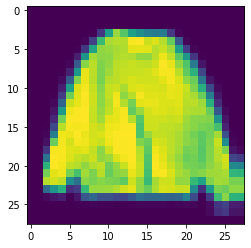

In [12]:
new_data = plt.imread('''Your Code Here''')

'''Your Code Here'''
plt.imshow(new_data)

In [13]:
'''Your Code Here'''

array([[0.04684713, 0.01758805, 0.4496804 , 0.06672866, 0.11823289,
        0.00959854, 0.22034885, 0.00553828, 0.06450282, 0.00093431]],
      dtype=float32)

#### 請回答以下問題 - 10%

1. 請問預測是否正確？
    * ans
2. 你覺得是為什麼？
    * ans

## 有什麼想對助教說的嗎？

### Gura 敲鼓讓他跑快一點

![](https://walfiegif.files.wordpress.com/2020/12/out-transparent-2.gif?w=870)